In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\3rd year materials\machine laerning\jobs_in_data.csv')

In [3]:
print(df['work_year'].unique())
# Output: [2023 2022] or [2022 2023]

[2023 2022 2020 2021]


In [4]:
# Get exact counts for each year
year_counts = df['work_year'].value_counts().sort_index()
print(year_counts)

# Output example:
# 2020     800
# 2021    1200
# 2022    3000
# 2023    4000

work_year
2020      71
2021     197
2022    1634
2023    7453
Name: count, dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           9355 non-null   int64  
 1   job_title           9329 non-null   object 
 2   job_category        9349 non-null   object 
 3   salary_currency     9343 non-null   object 
 4   salary              5516 non-null   float64
 5   salary_in_usd       8535 non-null   float64
 6   employee_residence  9349 non-null   object 
 7   experience_level    9345 non-null   object 
 8   employment_type     9344 non-null   object 
 9   work_setting        9345 non-null   object 
 10  company_location    9347 non-null   object 
 11  company_size        9345 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 877.2+ KB


In [6]:
# Display first 5 rows
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,NaN,95012.0,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,NaN,186000.0,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800.0,NaN,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,NaN,212000.0,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,NaN,93300.0,United States,Senior,Full-time,In-person,United States,M


In [7]:
# Check the shape (rows, columns)
print(f"Dataset shape: {df.shape}")

Dataset shape: (9355, 12)


In [8]:
# Get basic info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           9355 non-null   int64  
 1   job_title           9329 non-null   object 
 2   job_category        9349 non-null   object 
 3   salary_currency     9343 non-null   object 
 4   salary              5516 non-null   float64
 5   salary_in_usd       8535 non-null   float64
 6   employee_residence  9349 non-null   object 
 7   experience_level    9345 non-null   object 
 8   employment_type     9344 non-null   object 
 9   work_setting        9345 non-null   object 
 10  company_location    9347 non-null   object 
 11  company_size        9345 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 877.2+ KB


In [9]:
# Numerical columns statistics
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,5516.000000,8535.000000
mean,2022.760449,150302.934554,149171.000000
std,0.519470,64022.058886,63150.764843
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105500.000000,105000.000000
50%,2023.000000,143862.500000,142200.000000
75%,2023.000000,186700.000000,185900.000000
max,2023.000000,450000.000000,450000.000000


In [10]:
# Categorical columns statistics
df.describe(include=['object'])

,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9329,9349,9343,9349,9345,9344,9345,9347,9345
unique,125,10,11,83,4,4,3,70,3
top,Data Engineer,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
freq,2189,3010,8582,8081,6704,9299,5726,8126,8439


In [11]:
# Get all duplicate rows (keeping all copies)
duplicates = df[df.duplicated(keep=False)]

# Display duplicates
duplicates.sort_values(by=list(df.columns))

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
9280,2021,Data Scientist,Data Science and Research,EUR,76760.0,90734.0,Germany,Mid-level,Full-time,Hybrid,Germany,L
9314,2021,Data Scientist,Data Science and Research,EUR,76760.0,90734.0,Germany,Mid-level,Full-time,Hybrid,Germany,L
8574,2022,Analytics Engineer,Leadership and Management,USD,63000.0,63000.0,United States,Senior,Full-time,In-person,United States,M
8598,2022,Analytics Engineer,Leadership and Management,USD,63000.0,63000.0,United States,Senior,Full-time,In-person,United States,M
7989,2022,Analytics Engineer,Leadership and Management,USD,231250.0,231250.0,United States,Senior,Full-time,Remote,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
3298,2023,Research Scientist,Data Science and Research,USD,NaN,248100.0,United States,Senior,Full-time,In-person,United States,M
4067,2023,Research Scientist,Data Science and Research,USD,NaN,248100.0,United States,Senior,Full-time,In-person,United States,M
5075,2023,Research Scientist,Data Science and Research,USD,NaN,248100.0,United States,Senior,Full-time,In-person,United States,M
954,2023,Research Scientist,Data Science and Research,USD,NaN,303050.0,United States,Senior,Full-time,In-person,United States,M


In [12]:
# Keep only the first occurrence of each duplicate
df = df.drop_duplicates()

# Reset index after removal (optional)
df.reset_index(drop=True, inplace=True)

In [13]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (6640, 12)


In [14]:
#check null value
df.isnull().sum()

work_year                0
job_title               26
job_category             6
salary_currency         12
salary                2747
salary_in_usd          731
employee_residence       6
experience_level        10
employment_type         11
work_setting            10
company_location         8
company_size            10
dtype: int64

In [15]:
# Calculate percentage of missing values rounded to 2 decimal points
round(df.isnull().mean() * 100, 2)

work_year              0.00
job_title              0.39
job_category           0.09
salary_currency        0.18
salary                41.37
salary_in_usd         11.01
employee_residence     0.09
experience_level       0.15
employment_type        0.17
work_setting           0.15
company_location       0.12
company_size           0.15
dtype: float64

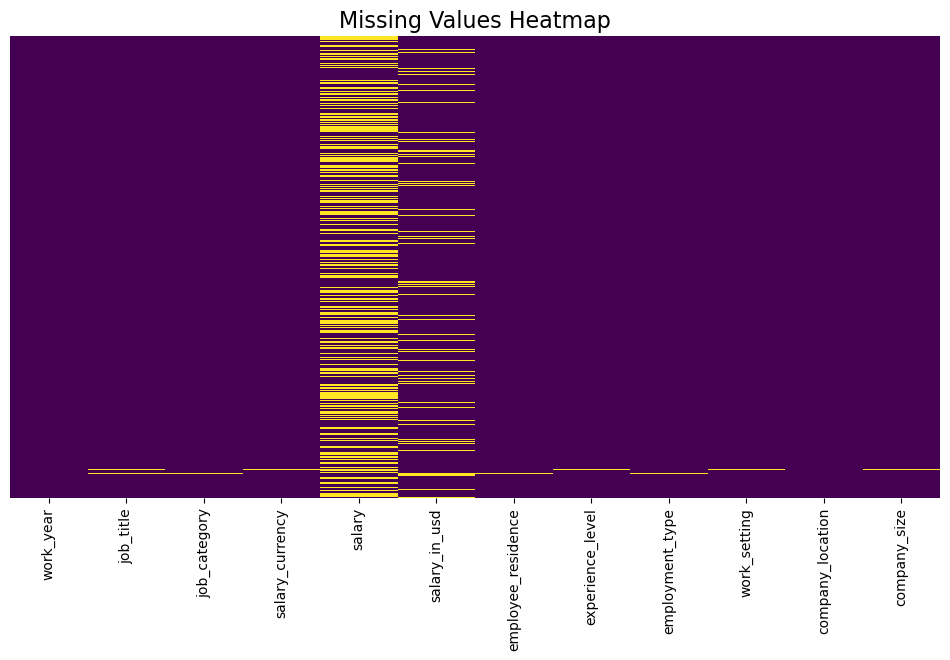

In [16]:
# Create a binary matrix indicating missing values (True = missing)
missing_matrix = df.isnull()

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_matrix, cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=16)
plt.show()

In [17]:
# find all rows where the job_title column is missing(NaN)
df[df['job_title'].isna()]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
5,2023,NaN,NaN,USD,130000.0,NaN,United States,NaN,Full-time,Remote,United States,NaN
29,2023,NaN,Machine Learning and AI,NaN,273400.0,273400.0,United States,Senior,NaN,In-person,NaN,M
105,2023,NaN,NaN,USD,185900.0,NaN,United States,Senior,Full-time,NaN,United States,M
185,2023,NaN,Data Architecture and Modeling,NaN,NaN,73100.0,United States,NaN,Full-time,In-person,NaN,M
278,2023,NaN,Data Engineering,NaN,NaN,219650.0,United States,NaN,Full-time,NaN,United States,NaN
350,2023,NaN,Data Engineering,USD,NaN,111400.0,NaN,Mid-level,NaN,In-person,NaN,M
549,2023,NaN,Machine Learning and AI,NaN,324000.0,NaN,United States,Senior,NaN,In-person,United States,NaN
682,2023,NaN,Data Science and Research,NaN,NaN,138510.0,United States,NaN,Full-time,In-person,NaN,M
822,2023,NaN,Data Architecture and Modeling,USD,NaN,81800.0,United States,NaN,NaN,In-person,NaN,M
1719,2023,NaN,Data Engineering,USD,NaN,90000.0,NaN,Mid-level,NaN,Remote,United States,NaN


In [18]:
#remove rows where the job_title is null (NaN)
df = df.dropna(subset=['job_title'])

In [19]:
#check null value after handlig null job_category
df.isnull().sum()

work_year                0
job_title                0
job_category             0
salary_currency          0
salary                2731
salary_in_usd          719
employee_residence       0
experience_level         0
employment_type          0
work_setting             0
company_location         0
company_size             0
dtype: int64

In [20]:
#Handling Missing salary_in_usd by Substituting with salary When Currency is USD

# Before handling missing values
print("Missing values in salary_in_usd before:", df['salary_in_usd'].isnull().sum())

# Create a condition where:
# 1. salary_in_usd is missing (NaN)
# 2. salary_currency is 'USD'
# 3. salary is not missing
condition = (df['salary_in_usd'].isna() & 
             (df['salary_currency'] == 'USD') & 
             df['salary'].notna())

# Fill missing salary_in_usd with salary where condition is True
df.loc[condition, 'salary_in_usd'] = df.loc[condition, 'salary']

# After handling missing values
print("Missing values in salary_in_usd after:", df['salary_in_usd'].isnull().sum())

Missing values in salary_in_usd before: 719
Missing values in salary_in_usd after: 4


In [21]:
# find all rows where the salary_in_usd column is missing(NaN)
df[df['salary_in_usd'].isna()]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
3110,2023,Machine Learning Engineer,Machine Learning and AI,USD,NaN,NaN,United States,Senior,Full-time,In-person,United States,M
4343,2023,Data Scientist,Data Science and Research,USD,NaN,NaN,United States,Senior,Full-time,Remote,United States,M
4704,2023,Insight Analyst,Data Analysis,GBP,42000.0,NaN,United Kingdom,Mid-level,Full-time,In-person,United Kingdom,M
6633,2021,Applied Machine Learning Scientist,Machine Learning and AI,USD,NaN,NaN,United States,Mid-level,Full-time,Hybrid,United States,L


In [22]:
#remove rows where the salary_in_usd is null (NaN)
df = df.dropna(subset=['salary_in_usd'])

In [23]:
# Drop 'salary' due to high missing values; drop 'salary_currency' as it's meaningless without salary
df = df.drop(columns=['salary','job_category', 'salary_currency'])

In [24]:
# Get all duplicate rows (keeping all copies)
duplicates = df[df.duplicated(keep=False)]

# Display duplicates
duplicates.sort_values(by=list(df.columns))

,work_year,job_title,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
6423,2021,Data Engineer,200000.0,United States,Mid-level,Full-time,Remote,United States,L
6500,2021,Data Engineer,200000.0,United States,Mid-level,Full-time,Remote,United States,L
5796,2022,Analytics Engineer,110000.0,United States,Senior,Full-time,Remote,United States,M
5831,2022,Analytics Engineer,110000.0,United States,Senior,Full-time,Remote,United States,M
5795,2022,Analytics Engineer,130000.0,United States,Senior,Full-time,Remote,United States,M
...,...,...,...,...,...,...,...,...,...
499,2023,Research Scientist,323300.0,United States,Senior,Full-time,In-person,United States,M
3338,2023,Research Scientist,323300.0,United States,Senior,Full-time,In-person,United States,M
740,2023,Research Scientist,370000.0,United States,Senior,Full-time,In-person,United States,M
3497,2023,Research Scientist,370000.0,United States,Senior,Full-time,In-person,United States,M


In [25]:
# Keep only the first occurrence of each duplicate
df = df.drop_duplicates()

# Reset index after removal (optional)
df.reset_index(drop=True, inplace=True)

In [26]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (5327, 9)


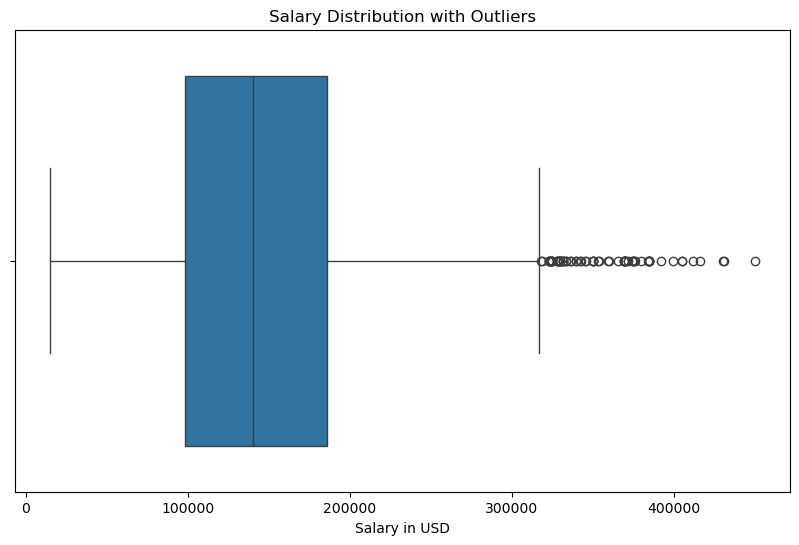

In [27]:
#check outliers by boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Salary Distribution with Outliers')
plt.xlabel('Salary in USD')
plt.show()

In [28]:
from scipy.stats.mstats import winsorize
import pandas as pd

# Define limits for winsorization (5% on both ends)
limits = [0.05, 0.05]

# Apply winsorization to all numeric columns
for col in df.select_dtypes(include=['number']).columns:
    winsorized = winsorize(df[col], limits=limits)
    df[col] = pd.Series(winsorized, index=df.index).astype(df[col].dtype)


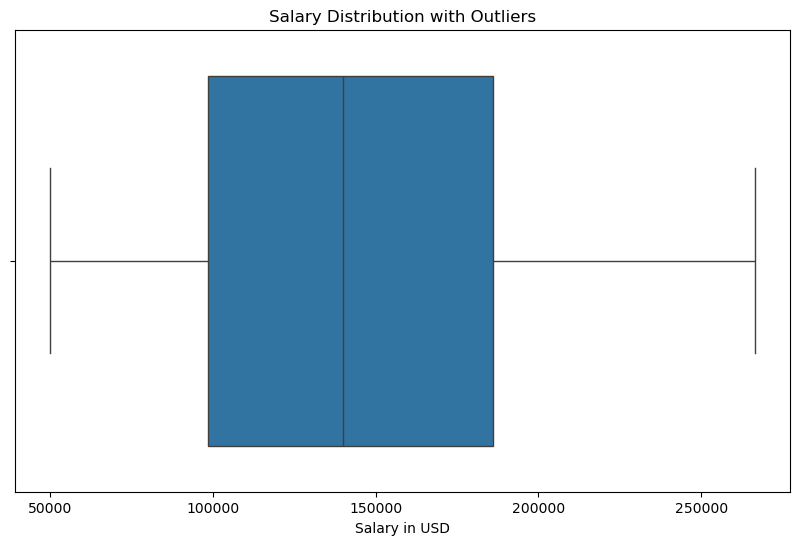

In [29]:
#check outliers by boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Salary Distribution with Outliers')
plt.xlabel('Salary in USD')
plt.show()

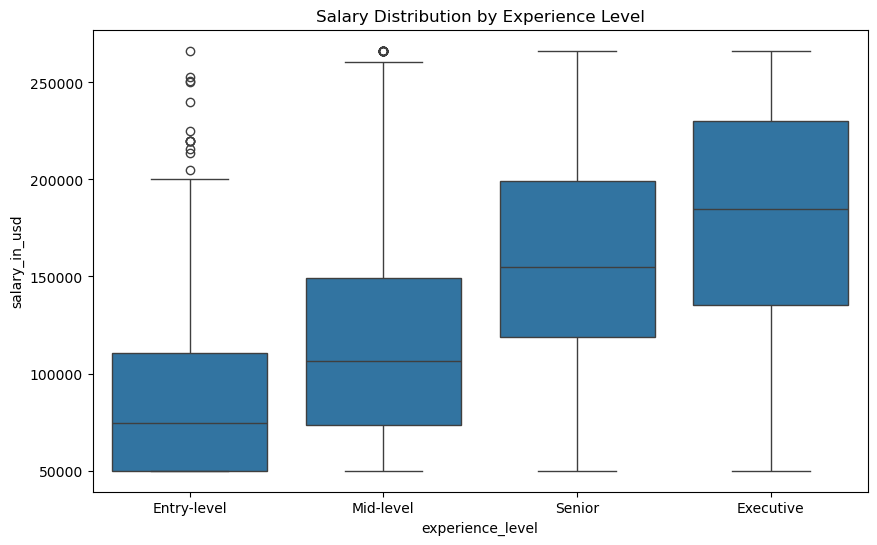

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df,
            order=['Entry-level', 'Mid-level', 'Senior', 'Executive'])
plt.title('Salary Distribution by Experience Level')
plt.show()

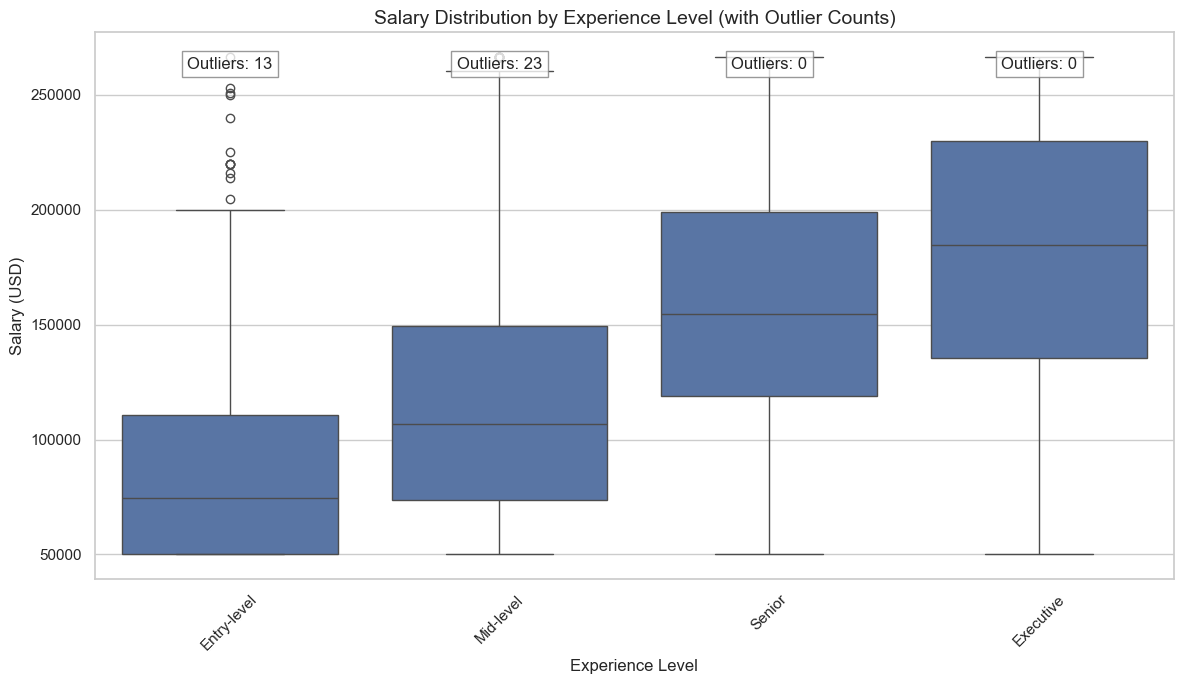

In [31]:

# Set style
sns.set(style="whitegrid")

# Create boxplot
plt.figure(figsize=(12, 7))
ax = sns.boxplot(
    x='experience_level', 
    y='salary_in_usd', 
    data=df,
    order=['Entry-level', 'Mid-level', 'Senior', 'Executive']
)

# Calculate and annotate outliers
def count_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return len(data[(data < lower_bound) | (data > upper_bound)])

# Get outlier counts for each category
outlier_counts = df.groupby('experience_level')['salary_in_usd'].apply(count_outliers)

# Add outlier count annotations
for i, level in enumerate(['Entry-level', 'Mid-level', 'Senior', 'Executive']):
    count = outlier_counts.get(level, 0)
    ax.text(i, ax.get_ylim()[1]*0.95, 
            f'Outliers: {count}',
            ha='center', va='center',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Add titles and labels
plt.title('Salary Distribution by Experience Level (with Outlier Counts)', fontsize=14)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [32]:
# def winsorize_by_group(df, group_col, value_col, lower_percentile=0.05, upper_percentile=0.95):
#     def winsorize_series(group):
#         lower = group[value_col].quantile(lower_percentile)
#         upper = group[value_col].quantile(upper_percentile)
#         group[value_col] = group[value_col].clip(lower=lower, upper=upper)
#         return group
    
#     return df.groupby(group_col, group_keys=False).apply(winsorize_series)
# df = winsorize_by_group(df, 'experience_level', 'salary_in_usd', 0.05, 0.95)

  


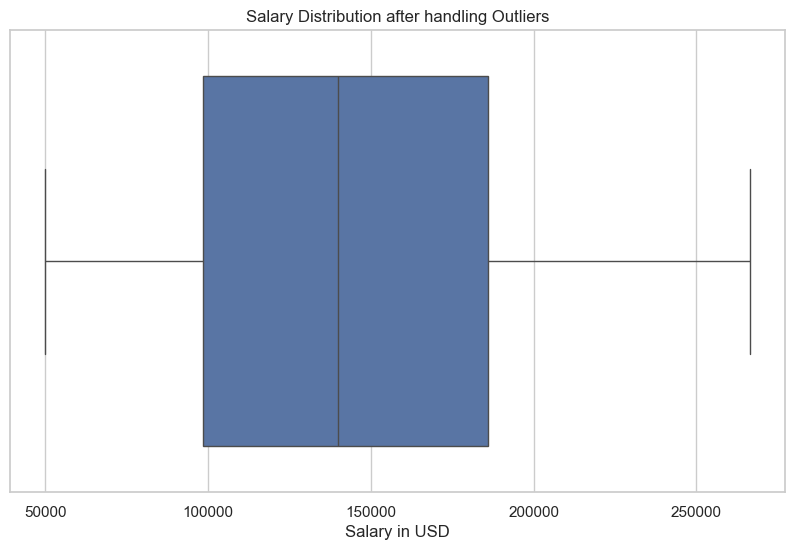

In [33]:
#check outliers by boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Salary Distribution after handling Outliers')
plt.xlabel('Salary in USD')
plt.show()

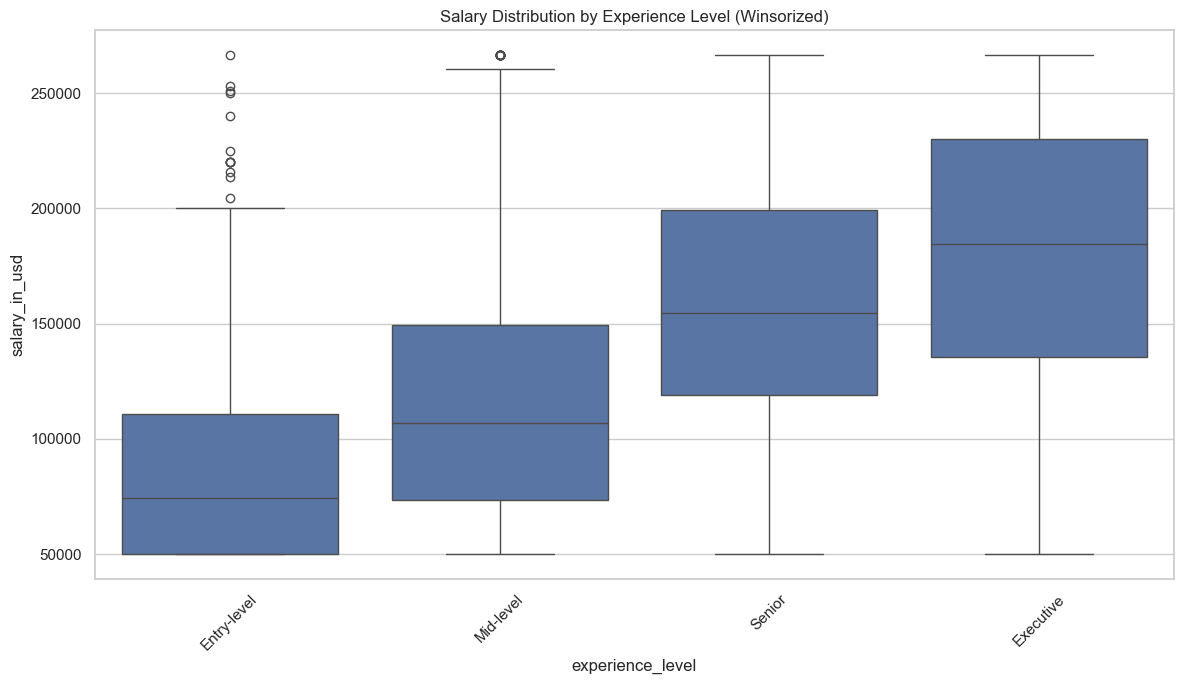

In [34]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    x='experience_level',
    y='salary_in_usd',
    data=df,
    order=['Entry-level', 'Mid-level', 'Senior', 'Executive']
)
plt.title('Salary Distribution by Experience Level (Winsorized)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
#plt.figure(figsize=(12, 8))
#sns.boxplot(x='job_category', y='salary_in_usd', data=df)
#plt.title('Salary Distribution by Job Category')
#plt.xticks(rotation=45)
#plt.show()

In [36]:
# def winsorize_by_group(df, group_col, value_col, lower_percentile=0.05, upper_percentile=0.95):
#     def winsorize_series(group):
#         lower = group[value_col].quantile(lower_percentile)
#         upper = group[value_col].quantile(upper_percentile)
#         group[value_col] = group[value_col].clip(lower=lower, upper=upper)
#         return group
    
#     return df.groupby(group_col, group_keys=False).apply(winsorize_series)
# df = winsorize_by_group(df, 'job_category', 'salary_in_usd', 0.05, 0.95)


In [37]:
#plt.figure(figsize=(12, 8))
#sns.boxplot(x='job_category', y='salary_in_usd', data=df)
#plt.title('Salary Distribution by Job Category')
#plt.xticks(rotation=45)
#plt.show()

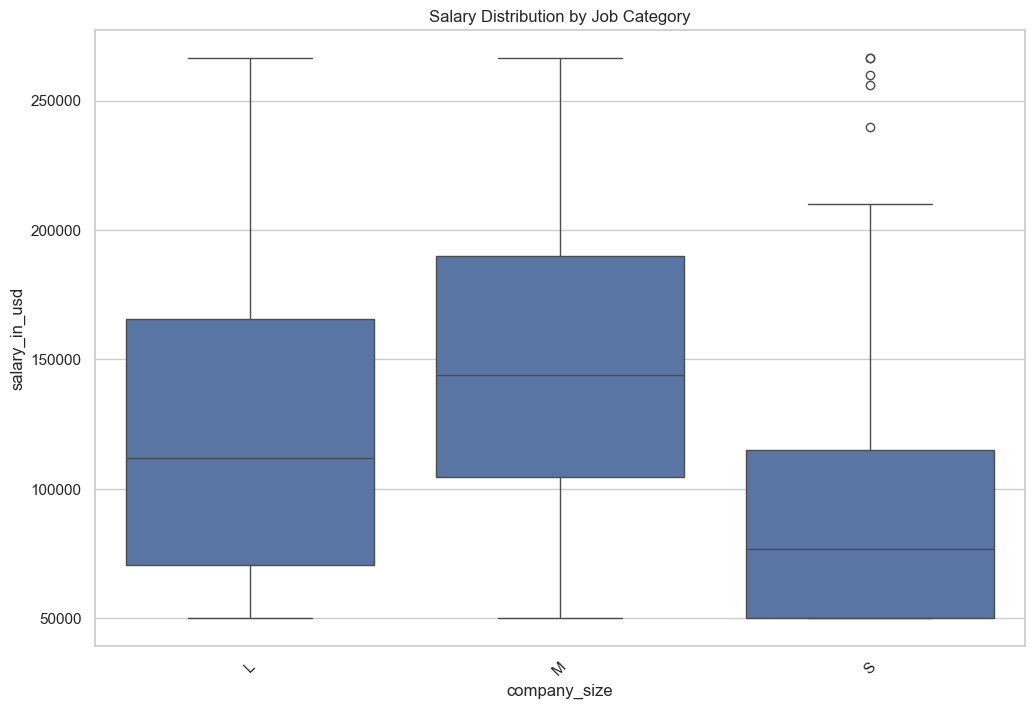

In [38]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)
plt.show()

In [39]:
# def winsorize_by_group(df, group_col, value_col, lower_percentile=0.05, upper_percentile=0.95):
#     def winsorize_series(group):
#         lower = group[value_col].quantile(lower_percentile)
#         upper = group[value_col].quantile(upper_percentile)
#         group[value_col] = group[value_col].clip(lower=lower, upper=upper)
#         return group
    
#     return df.groupby(group_col, group_keys=False).apply(winsorize_series)
# df = winsorize_by_group(df, 'company_size', 'salary_in_usd', 0.05, 0.95)


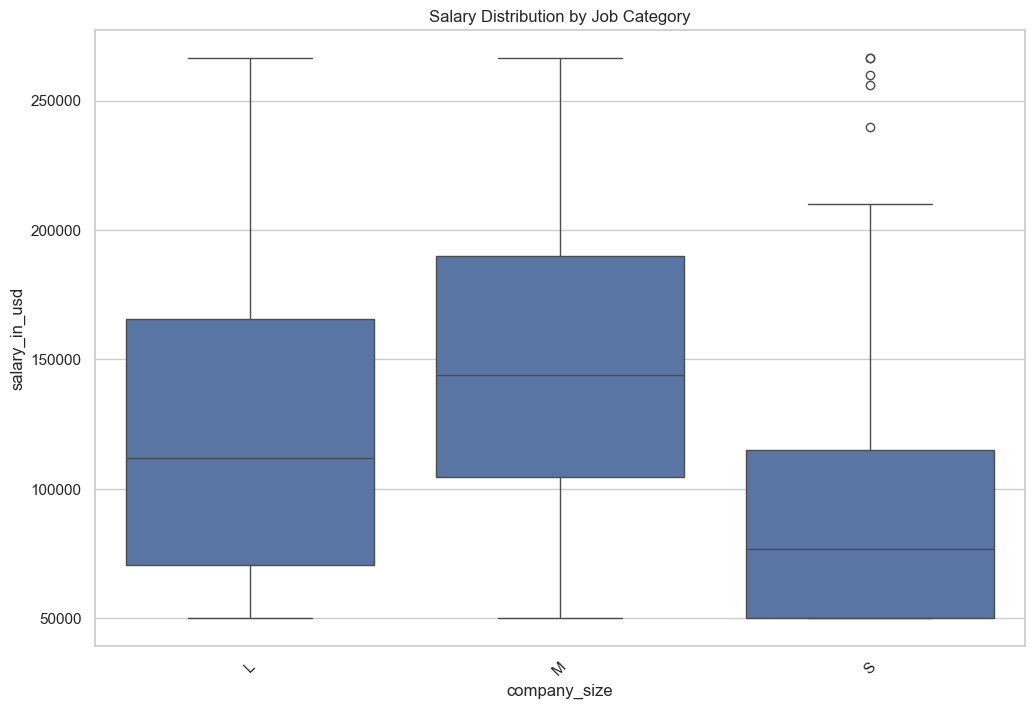

In [40]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)
plt.show()

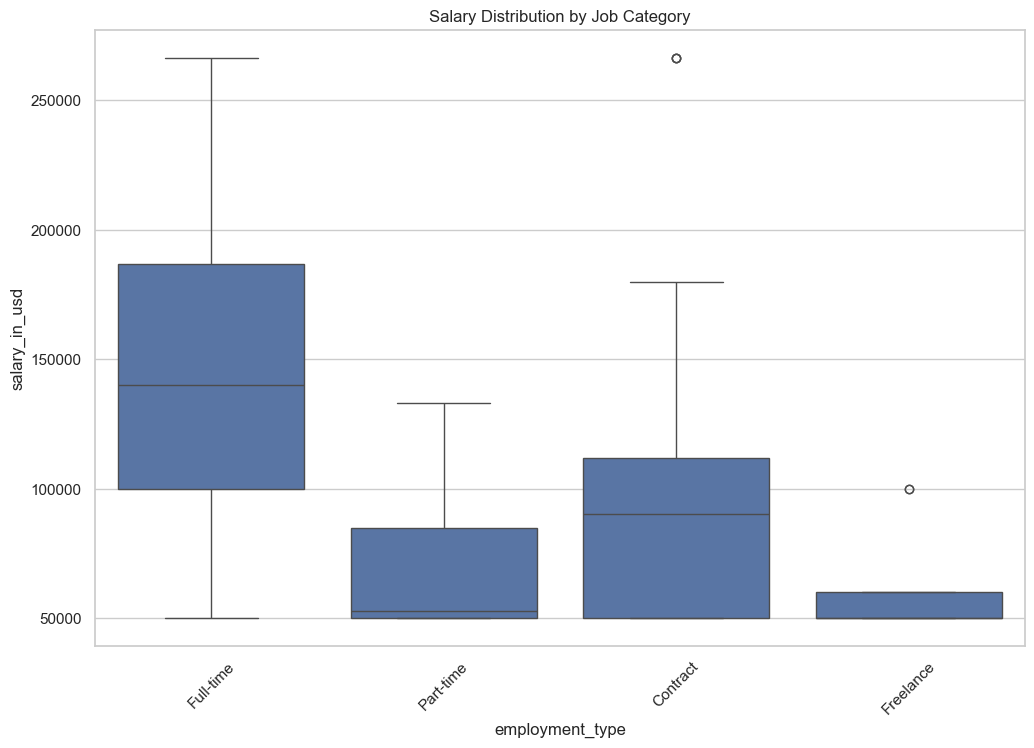

In [41]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)
plt.show()

In [42]:
# def winsorize_by_group(df, group_col, value_col, lower_percentile=0.05, upper_percentile=0.95):
#     def winsorize_series(group):
#         lower = group[value_col].quantile(lower_percentile)
#         upper = group[value_col].quantile(upper_percentile)
#         group[value_col] = group[value_col].clip(lower=lower, upper=upper)
#         return group
    
#     return df.groupby(group_col, group_keys=False).apply(winsorize_series)
# df = winsorize_by_group(df, 'employment_type', 'salary_in_usd', 0.05, 0.95)


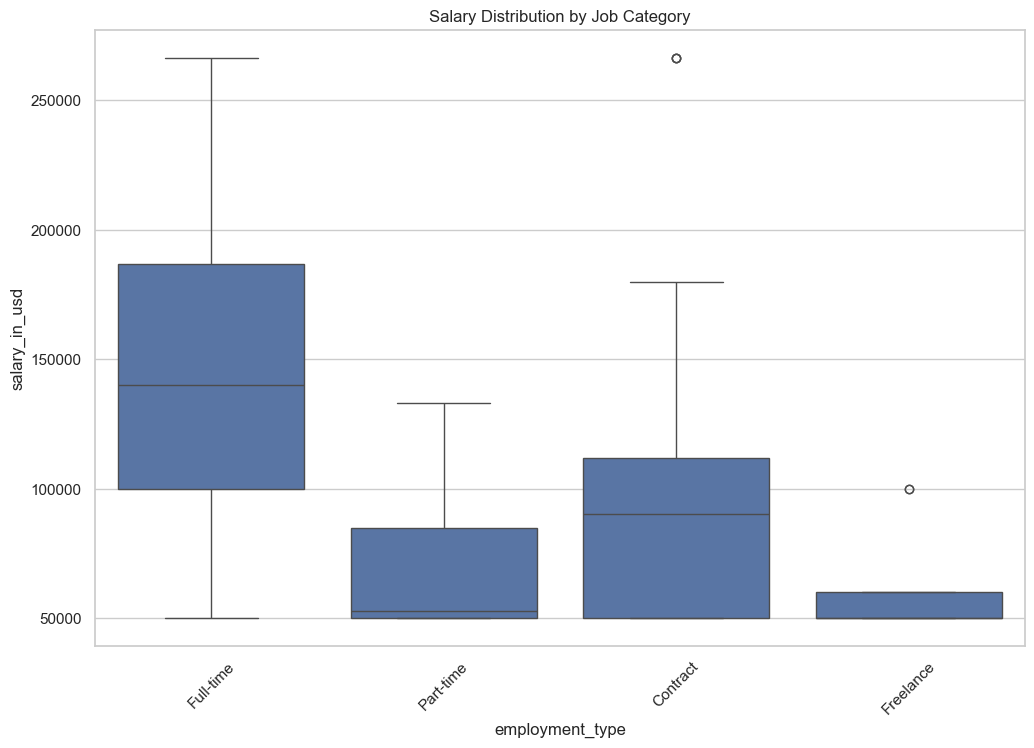

In [43]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)
plt.show()

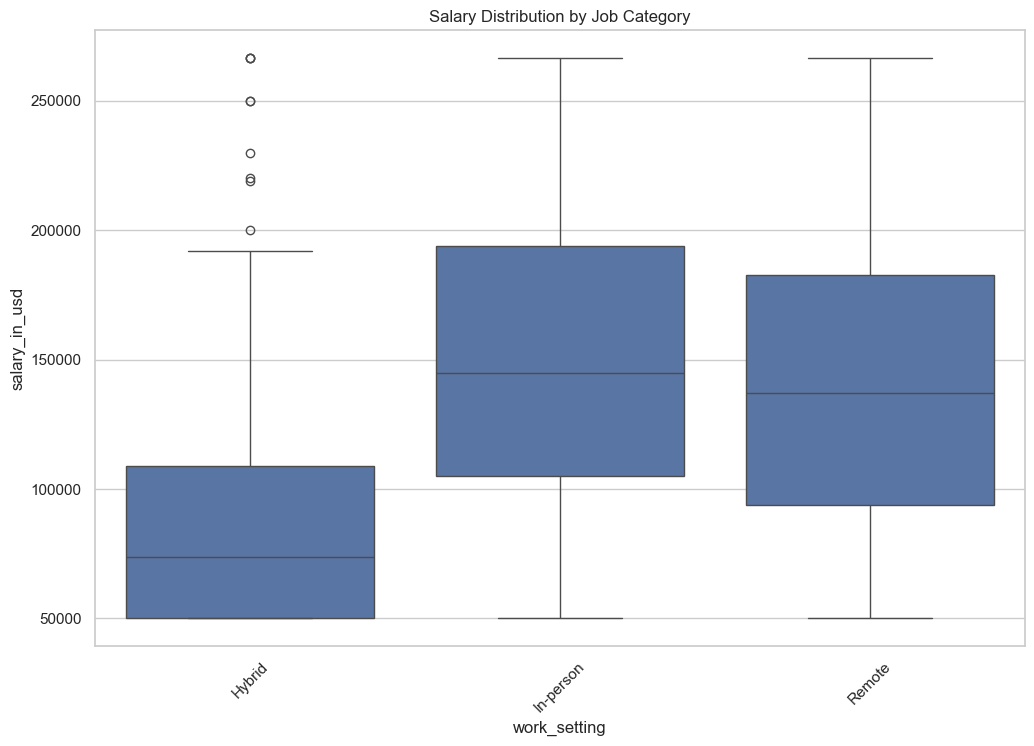

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='work_setting', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)
plt.show()

In [45]:
# def winsorize_by_group(df, group_col, value_col, lower_percentile=0.05, upper_percentile=0.95):
#     def winsorize_series(group):
#         lower = group[value_col].quantile(lower_percentile)
#         upper = group[value_col].quantile(upper_percentile)
#         group[value_col] = group[value_col].clip(lower=lower, upper=upper)
#         return group
    
#     return df.groupby(group_col, group_keys=False).apply(winsorize_series)
# df = winsorize_by_group(df, 'work_setting', 'salary_in_usd', 0.05, 0.95)


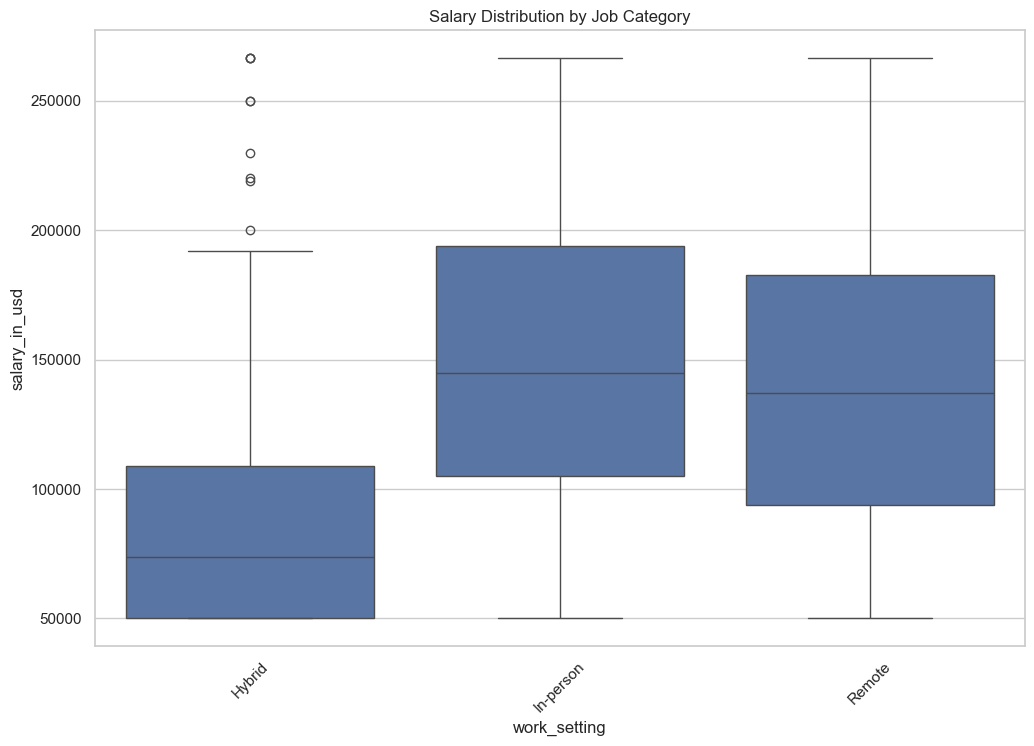

In [46]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='work_setting', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)
plt.show()

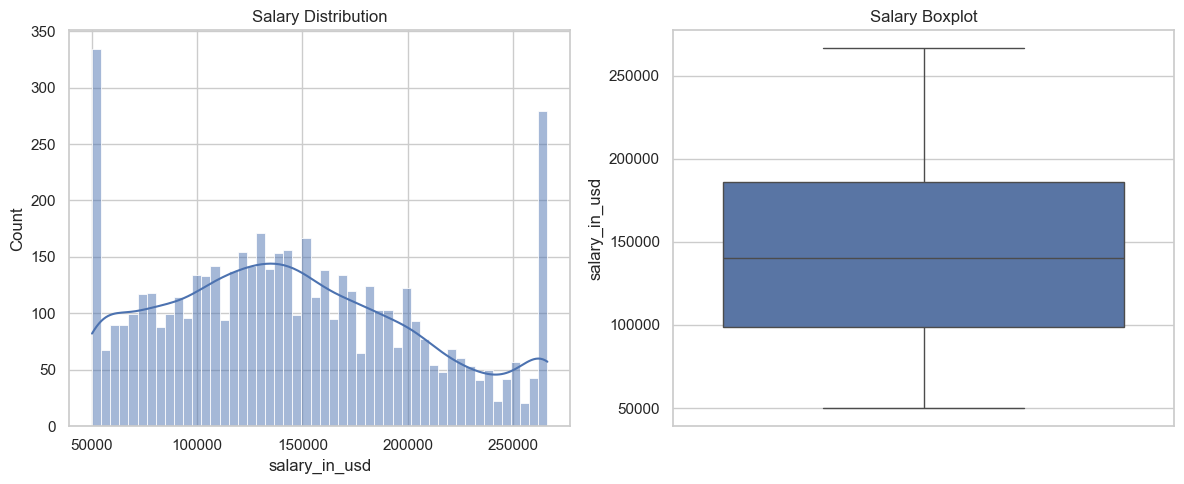

In [47]:
plt.figure(figsize=(12, 5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Salary Distribution')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['salary_in_usd'])
plt.title('Salary Boxplot')

plt.tight_layout()
plt.show()

In [48]:

from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
salary_skew = skew(df['salary_in_usd'])
salary_kurt = kurtosis(df['salary_in_usd'])

print(f"Skewness: {salary_skew:.2f}")
print(f"Kurtosis: {salary_kurt:.2f}")

# Interpretation guide
print("\nSkewness Interpretation:")
print("0: Perfectly symmetrical")
print("0 to 0.5: Fairly symmetrical")
print("0.5 to 1: Moderately skewed")
print(">1: Highly skewed")

Skewness: 0.31
Kurtosis: -0.75

Skewness Interpretation:
0: Perfectly symmetrical
0 to 0.5: Fairly symmetrical
0.5 to 1: Moderately skewed
>1: Highly skewed


In [49]:
import numpy as np

# Log-transform the target
df['salary_log'] = np.log1p(df['salary_in_usd'])


In [50]:
# Drop one location column due to 97.8% overlap — both give nearly identical info
# Keeping only one to avoid redundancy and simplify the model
df.drop(columns=['employee_residence'], inplace=True)

In [51]:
df.head()

,work_year,job_title,salary_in_usd,experience_level,employment_type,work_setting,company_location,company_size,salary_log
0,2023,Data DevOps Engineer,95012.0,Mid-level,Full-time,Hybrid,Germany,L,11.461769
1,2023,Data Architect,186000.0,Senior,Full-time,In-person,United States,M,12.133507
2,2023,Data Architect,81800.0,Senior,Full-time,In-person,United States,M,11.312045
3,2023,Data Scientist,212000.0,Senior,Full-time,In-person,United States,M,12.264346
4,2023,Data Scientist,93300.0,Senior,Full-time,In-person,United States,M,11.443586


In [52]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (5327, 9)


In [53]:
#separate feature and target 
# Features (independent variables)
X = df.drop(columns=["salary_in_usd"])

# Target (dependent variable)
y = df["salary_in_usd"]

# Display shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (5327, 8)
Target shape: (5327,)


In [54]:
print("Regression Features:")
print(X.head())

print("\nRegression Target:")
print(y.head())


Regression Features:
   work_year             job_title experience_level employment_type  \
0       2023  Data DevOps Engineer        Mid-level       Full-time   
1       2023        Data Architect           Senior       Full-time   
2       2023        Data Architect           Senior       Full-time   
3       2023        Data Scientist           Senior       Full-time   
4       2023        Data Scientist           Senior       Full-time   

  work_setting company_location company_size  salary_log  
0       Hybrid          Germany            L   11.461769  
1    In-person    United States            M   12.133507  
2    In-person    United States            M   11.312045  
3    In-person    United States            M   12.264346  
4    In-person    United States            M   11.443586  

Regression Target:
0     95012.0
1    186000.0
2     81800.0
3    212000.0
4     93300.0
Name: salary_in_usd, dtype: float64


In [55]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes
print("Regression Training Features:", X_train.shape)
print("Regression Testing Features:", X_test.shape)
print("Regression Training Target:", y_train.shape)
print("Regression Testing Target:", y_test.shape)

Regression Training Features: (4261, 8)
Regression Testing Features: (1066, 8)
Regression Training Target: (4261,)
Regression Testing Target: (1066,)


In [56]:
# Target encoding replaces each 'job_title' and 'company_location' with the average salary in training data.
# This method captures the relationship between job title and salary, reducing dimensionality
# compared to one-hot encoding and can improve model performance, especially for tree-based models.
# It also helps handle high-cardinality categorical features efficiently.
# Unseen job titles in the test set are filled with the global mean salary to prevent errors.

# Step 1: Create a temp DataFrame to compute encodings using training data only
train_temp = X_train.copy()
train_temp['salary_in_usd'] = y_train

# Step 2: Compute mean salary for each category
job_encoding = train_temp.groupby('job_title')['salary_in_usd'].mean()
location_encoding = train_temp.groupby('company_location')['salary_in_usd'].mean()

# Step 3: Map encodings to train/test sets
X_train['job_title_encoded'] = X_train['job_title'].map(job_encoding)
X_test['job_title_encoded'] = X_test['job_title'].map(job_encoding)

X_train['company_location_encoded'] = X_train['company_location'].map(location_encoding)
X_test['company_location_encoded'] = X_test['company_location'].map(location_encoding)


# Step 3: Handle unseen categories in test set by filling with global mean
global_mean = y_train.mean()
X_test['job_title_encoded'] = X_test['job_title_encoded'].fillna(global_mean)
X_test['company_location_encoded'] = X_test['company_location_encoded'].fillna(global_mean)

# Step 4: Drop original categorical columns if no longer needed
X_train.drop(columns=['job_title', 'company_location'], inplace=True)
X_test.drop(columns=['job_title', 'company_location'], inplace=True)

In [57]:
#One-Hot Encode these (unordered categorical variables)
one_hot_cols = ['employment_type', 'work_setting']

# Apply to training set
X_train = pd.get_dummies(X_train, columns=one_hot_cols, drop_first=True) #drop_first=True to avoids multicollinearity.

# Apply same transformation to test set (ensure same columns)
X_test = pd.get_dummies(X_test, columns=one_hot_cols, drop_first=True)

# Align columns of test set with train set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [58]:
#for experiance level
experience_map = {'Entry-level': 1, 'Mid-level': 2, 'Senior': 3, 'Executive': 4}
X_train['experience_level_encoded'] = X_train['experience_level'].map(experience_map)
X_test['experience_level_encoded'] = X_test['experience_level'].map(experience_map)

#for company size
# Company Size: S < M < L
size_map = {'S': 1, 'M': 2, 'L': 3}
X_train['company_size_encoded'] = X_train['company_size'].map(size_map)
X_test['company_size_encoded'] = X_test['company_size'].map(size_map)

# 5. Drop original ordinal columns
X_train.drop(columns=['experience_level', 'company_size'], inplace=True)
X_test.drop(columns=['experience_level', 'company_size'], inplace=True)

In [59]:
# Final check
print("Transformed X_train shape:", X_train.shape)
print("Transformed X_test shape:", X_test.shape)

Transformed X_train shape: (4261, 11)
Transformed X_test shape: (1066, 11)


In [63]:
from sklearn.preprocessing import StandardScaler

# Create a scaler for X
scaler_X = StandardScaler()

# Fit and transform X
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Do NOT scale y
# Just use y_train and y_test as-is


In [64]:
# This is not recommended for your models:
y_train = scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test = scaler.transform(y_test.to_numpy().reshape(-1, 1))


NameError: name 'scaler' is not defined

In [ ]:
X_train.head()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Initialize the model
lr_model = LinearRegression()

# 2. Fit the model on training data
lr_model.fit(X_train, y_train)

# 3. Predict on test data
y_pred = lr_model.predict(X_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

# 2. Fit the model to the training data
tree_model.fit(X_train, y_train)

# 3. Predict on the test data
y_pred = tree_model.predict(X_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree - Mean Squared Error:", mse)
print("Decision Tree - R² Score:", r2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Fit the model on the training data
rf_model.fit(X_train, y_train)

# 3. Predict on the test data
y_pred = rf_model.predict(X_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest - Mean Squared Error:", mse)
print("Random Forest - R² Score:", r2)


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Scale the features (important for SVM!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train SVR model
svr_model = SVR(kernel='rbf')  # You can also try 'linear' or 'poly'
svr_model.fit(X_train_scaled, y_train)

# Step 3: Predict
y_pred = svr_model.predict(X_test_scaled)

# Step 4: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SVR - Mean Squared Error:", mse)
print("SVR - R² Score:", r2)


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Step 2: Train the model
xgb_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = xgb_model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost - Mean Squared Error:", mse)
print("XGBoost - R² Score:", r2)
